UnboundLocalError: cannot access local variable 'mesh_x' where it is not associated with a value

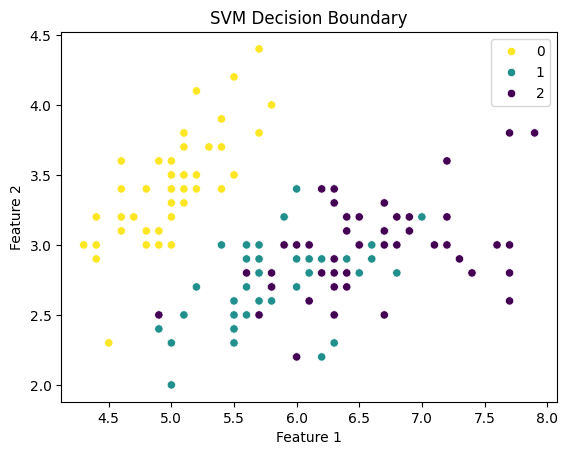

In [3]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def min_max(*args, margin=0):
    res = []
    for arg in args:
        res.append(arg.min() - margin)
        res.append(arg.max() + margin)
    return res

def class_plot_config(P, A, steps, mode, title=None, ax_labels=None, subs=None):
    if subs is not None:
        rows, cols, index = subs
        plt.subplot(rows, cols, index)
    else:
        plt.show()

    if title is not None:
        plt.title(title)
    if ax_labels is not None:
        plt.xlabel(ax_labels['x'])
        plt.ylabel(ax_labels['y'])

    Px, Py = P[:, 0], P[:, 1]
    sb.scatterplot(x=Px, y=Py, hue=A, palette='viridis_r')

    min_x, max_x, min_y, max_y = min_max(Px, Py, margin=1)
    step = np.abs(min([(max_x / min_x) / steps, (max_y / min_y) / steps]))

    if mode == 1:
        mesh_x, mesh_y = np.meshgrid(np.arange(min_x, max_x, step), np.arange(min_y, max_y, step))
    else:
        graph = plt.gca()
        (xmin, xmax), (ymin, ymax) = graph.get_xlim(), graph.get_ylim()
        mesh_x, mesh_y = np.meshgrid(np.linspace(min_x, max_x, mesh_x.shape[1]), np.linspace(min_y, max_y, mesh_y.shape[0]))

    plt.xlim(min_max(mesh_x))
    plt.ylim(min_max(mesh_y))
    
    return mesh_x, mesh_y

def class_plot_2D(model, P, A, steps, title=None, ax_labels=None, subs=None):
    mesh_x, mesh_y = class_plot_config(P, A, steps, 2, title, ax_labels, subs)

    decfun = model.decision_function(P)
    svi = np.where(np.abs(decfun) <= 1)[0]
    sv = P[svi]

    C = model.decision_function(np.c_[mesh_x.ravel(), mesh_y.ravel()])
    C = C.reshape(mesh_x.shape)

    ls = ['dotted', 'solid', 'dotted']
    lv = [-1, 0, 1]
    plt.contour(mesh_x, mesh_y, C, lv, colors='k', linestyles=ls)
    plt.scatter(sv[:, 0], sv[:, 1], s=100, fc='none', ec='k')

# Exemplo de uso:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

model = svm.SVC(kernel='linear')
model.fit(X, y)

class_plot_2D(model, X, y, steps=100, title="SVM Decision Boundary", ax_labels={'x': 'Feature 1', 'y': 'Feature 2'})
plt.show()
